In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os

In [2]:
def load_data(file_path):
    try:
        # Normalize the file path
        normalized_path = os.path.normpath(file_path.strip('"'))
        return pd.read_csv(normalized_path)
    except FileNotFoundError:
        print(f"Error: The file '{normalized_path}' was not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{normalized_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse '{normalized_path}'. Please ensure it's a valid CSV file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None

In [3]:
def basic_info(df):
    print("Basic Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())

In [4]:
def descriptive_stats(df):
    print("\nDescriptive Statistics:")
    print(df.describe().T)

In [5]:
def correlation_analysis(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

In [6]:
def distribution_plots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

In [7]:
def boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

In [8]:
def categorical_analysis(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Bar Plot of {col}")
        plt.show()

Enter the path to your CSV file:  "D:\Coding\Python\basic\data\results.csv"


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB
None

Missing Values:
year            2601
type            2601
discipline         1
event              0
as                 0
athlete_id         0
noc                1
team          186694
place          25215
tied               0
medal         264269

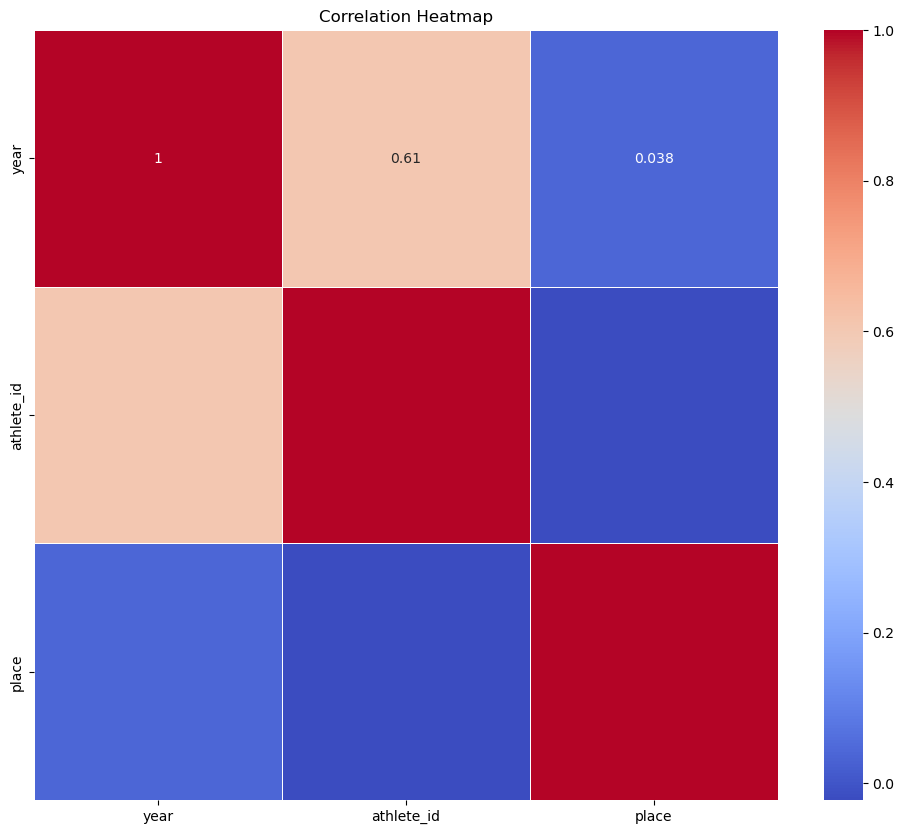

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


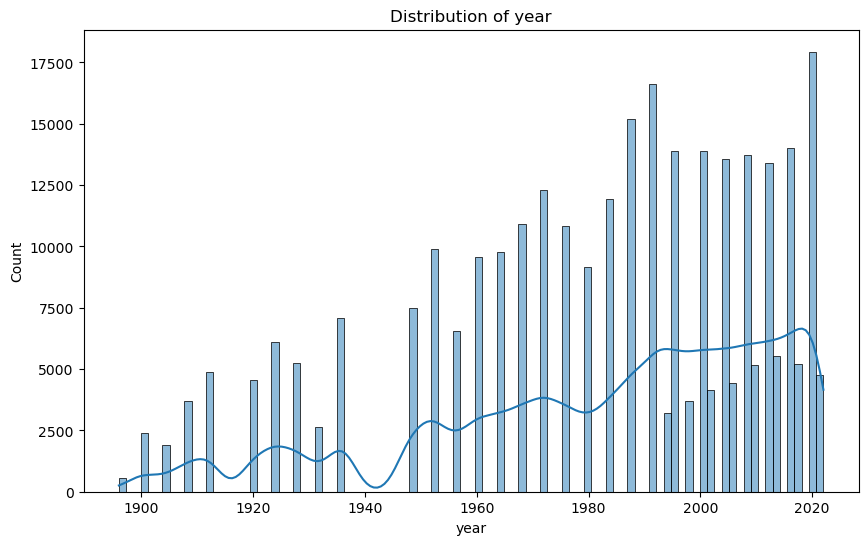

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


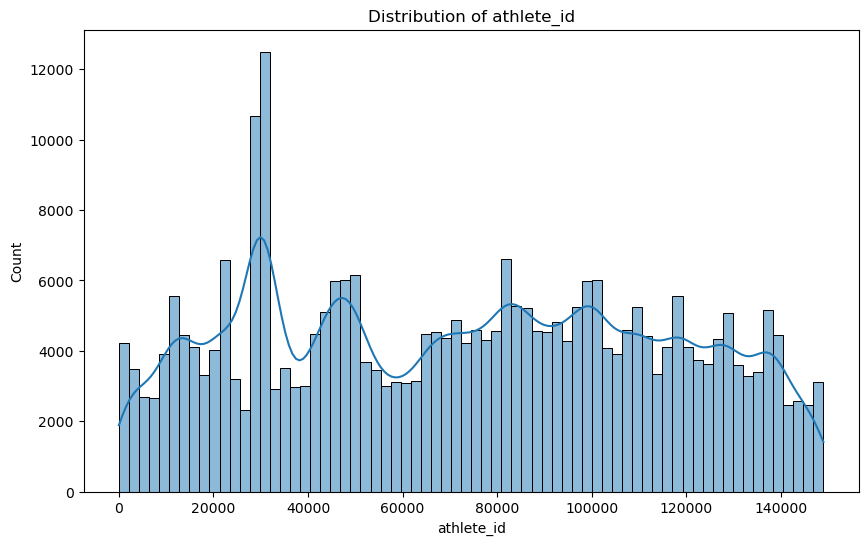

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


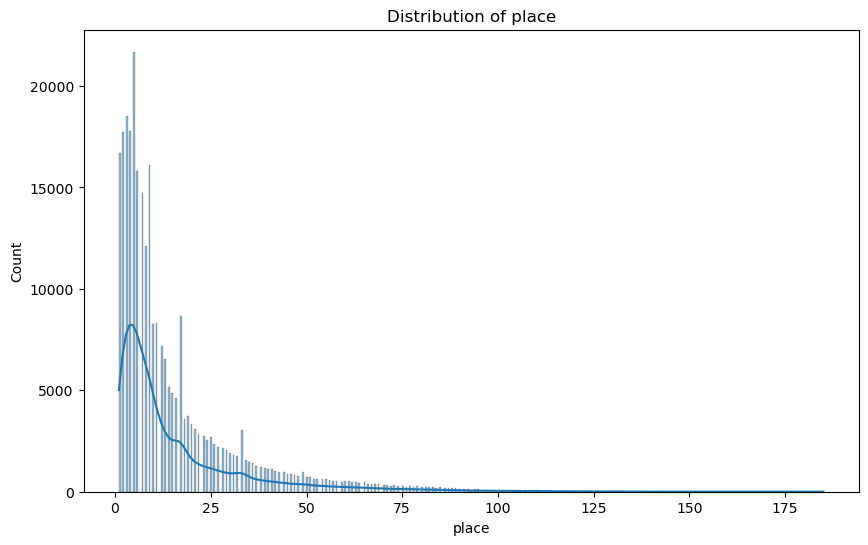

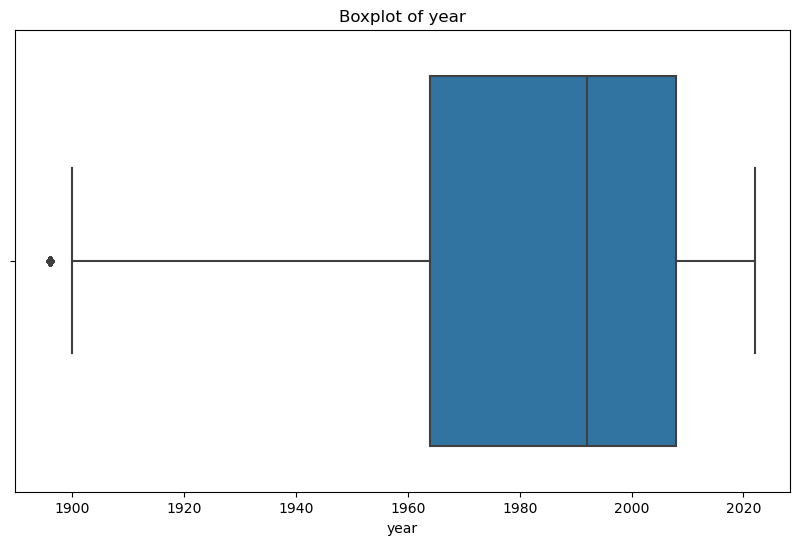

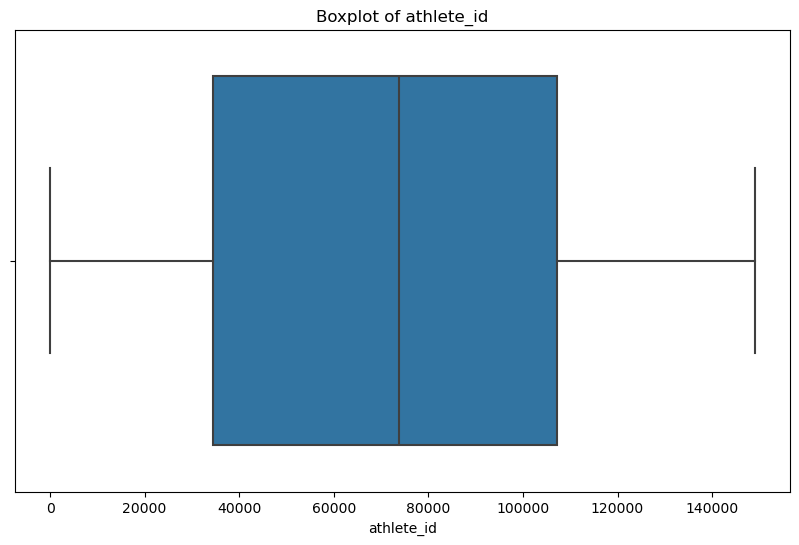

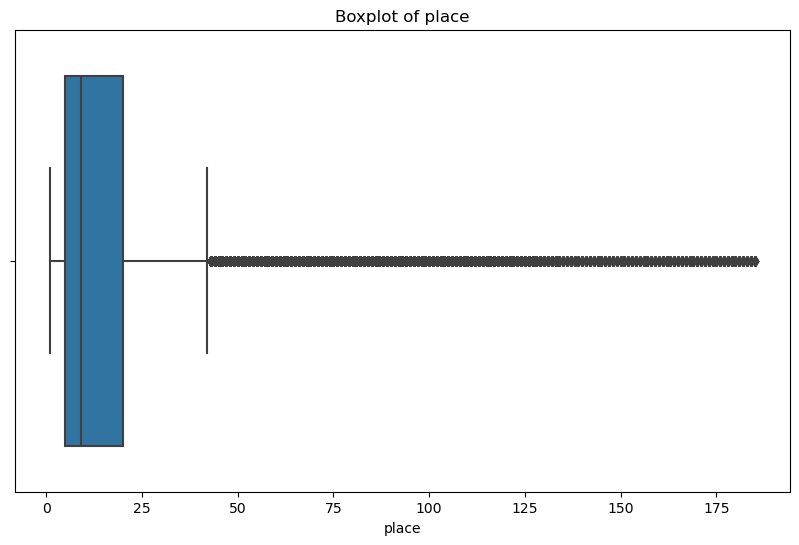


Value Counts for type:
type
Summer    241298
Winter     64509
Name: count, dtype: int64


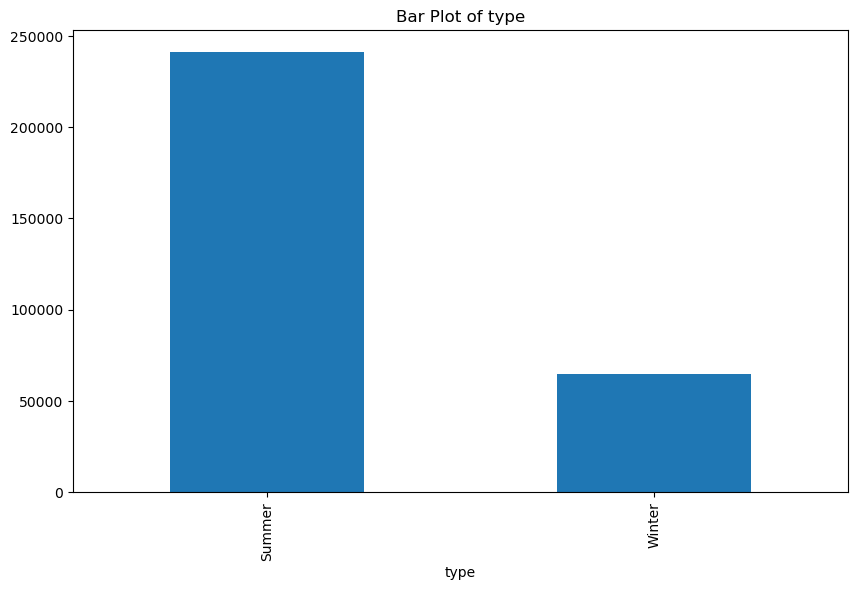


Value Counts for discipline:
discipline
Athletics                           45916
Artistic Gymnastics (Gymnastics)    27721
Swimming (Aquatics)                 26526
Fencing                             12156
Shooting                            12029
                                    ...  
Speed Skiing (Skiing)                   1
Australian Rules Football               1
Bandy                                   1
Glíma                                   1
Roller Skating (Roller Sports)          1
Name: count, Length: 93, dtype: int64


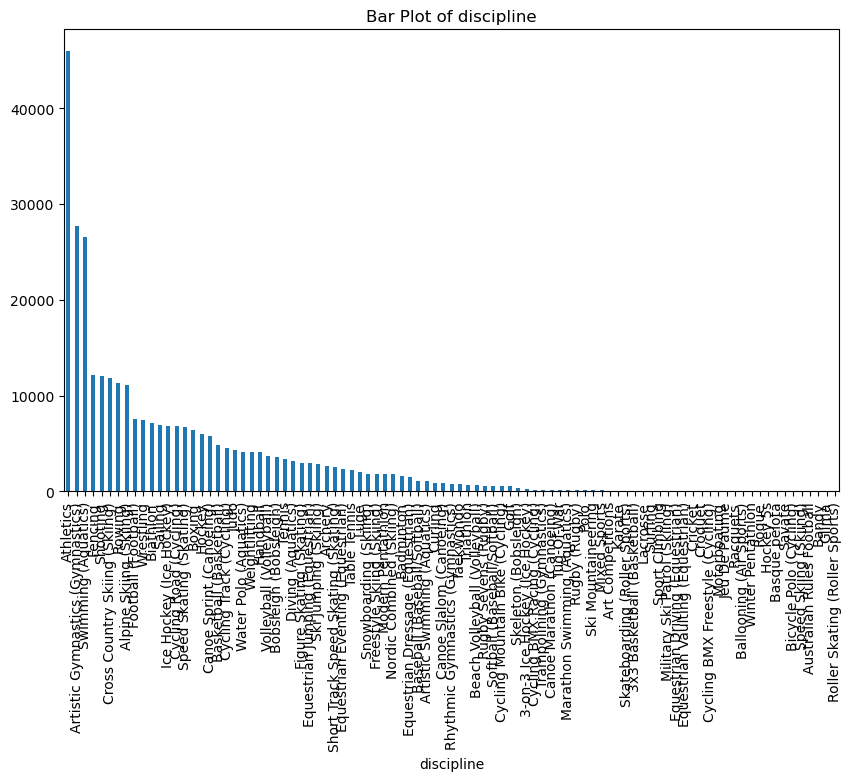


Value Counts for event:
event
Football, Men (Olympic)                            6135
Ice Hockey, Men (Olympic)                          5345
Hockey, Men (Olympic)                              4271
Individual, Men (Olympic)                          3830
Water Polo, Men (Olympic)                          3585
                                                   ... 
≤100 kilograms, Freestyle, Boys (YOG)                 1
Rugby Sevens, Boys (YOG)                              1
Standing Triple Jump, Men (Olympic (non-medal))       1
≤85 kilograms, Greco Roman, Boys (YOG)                1
Doubles, Mixed (Olympic (non-medal))                  1
Name: count, Length: 1191, dtype: int64


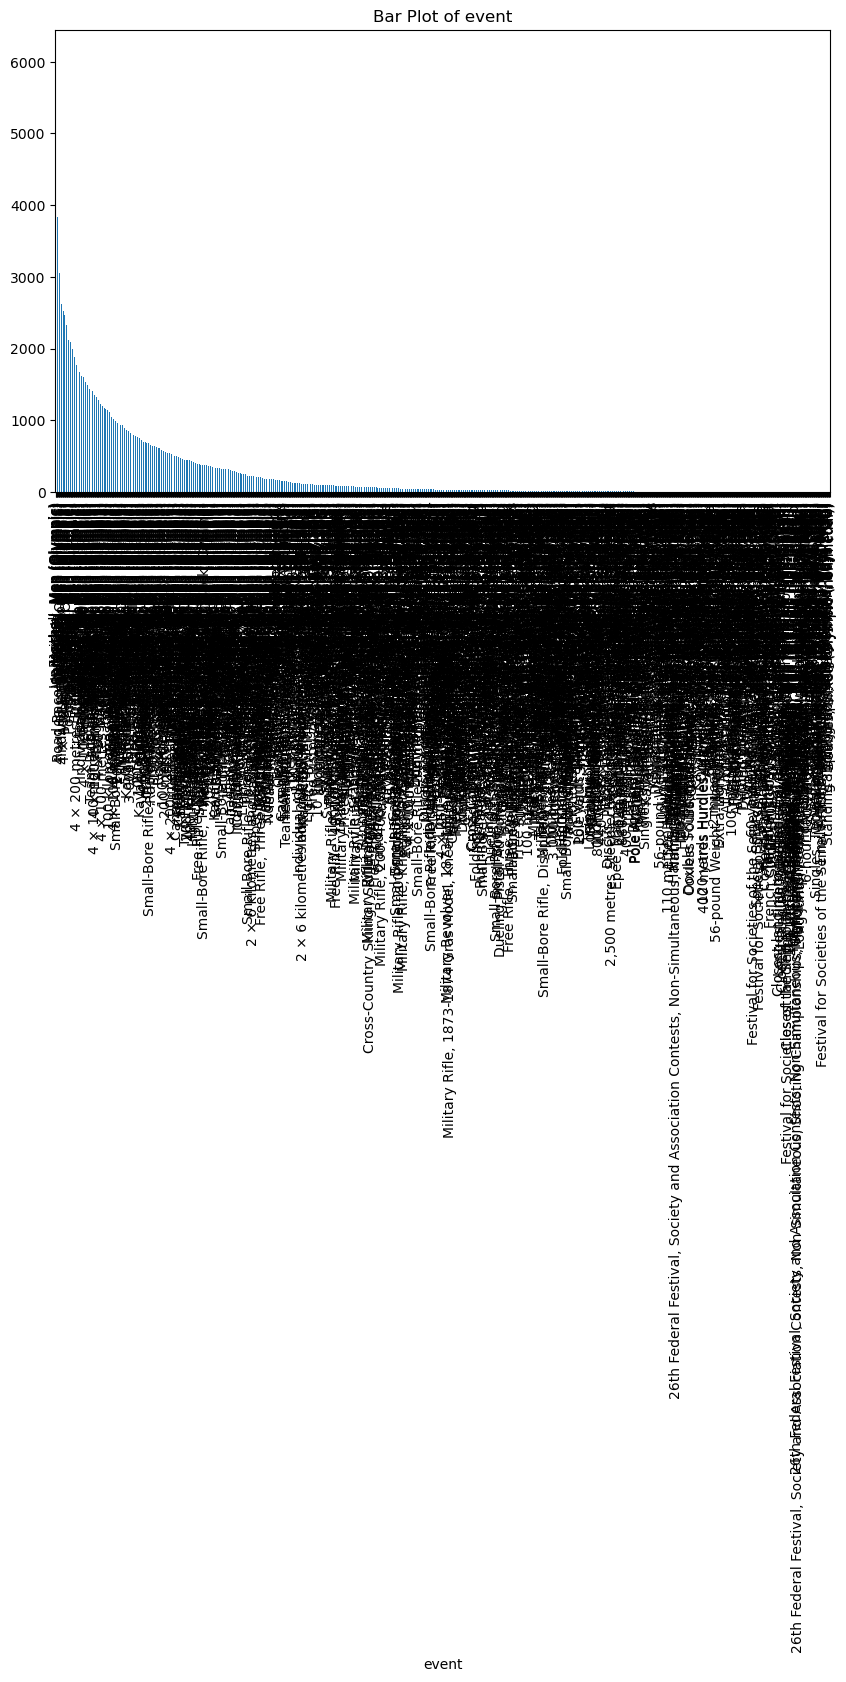


Value Counts for as:
as
Heikki Savolainen         39
Josy Stoffel              38
Ioannis Theofilakis       37
Eric Lemming              34
Alexandros Theofilakis    33
                          ..
Fritz Dällenbach           1
Roger Flood                1
Neil Forster               1
Charles Foulkes            1
Charlotta Säfvenberg       1
Name: count, Length: 144005, dtype: int64


In [ ]:
def main():
    file_path = input("Enter the path to your CSV file: ")
    df = load_data(file_path)
    
    basic_info(df)
    descriptive_stats(df)
    correlation_analysis(df)
    distribution_plots(df)
    boxplots(df)
    categorical_analysis(df)

if __name__ == "__main__":
    main()